# Pseudo Random
I will use this notebook to investigate the power-residue method to generate pseudo-random numbers.

Let $a$,$c$ and $M$ be constants. Assume a seed $r_0$ is given. The sequence of numbers ${r_i}_{i=1,2,..}$ is generated as:

$$ r_{i+1} \equiv a r_i + c \pmod{M}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def gen_r(r,a,c,M):
    return (a*r + c) % M

In [115]:
M = 512
r_0 = np.random.randint(M)
a = 7
c = 1

num_to_gen = 10000
rand_list = np.zeros(num_to_gen)
rand_list[0] = r_0
for i in range(num_to_gen - 1):
    rand_list[i + 1] = gen_r(rand_list[i],a,c,M)

Text(0.5,1,'Random Number Sequence')

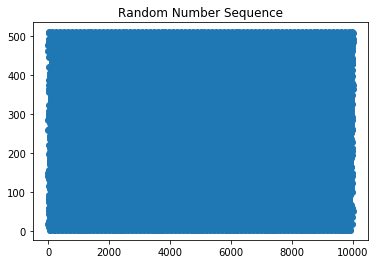

In [116]:
plt.plot(rand_list,'o')
plt.title("Random Number Sequence")

Text(0.5,1,'Random number distirbution')

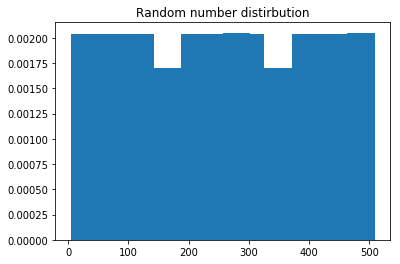

In [117]:
# see the distribution
plt.hist(rand_list,bins="auto",density=True)
plt.title("Random number distirbution")

In [104]:
# comparison
computer_random = M*np.random.rand(num_to_gen)
score = np.mean(computer_random - np.array(rand_list))
print("Score",score)

Score -1.7735500159316404


In [105]:
# study of score vs num_to_gen
def gen_random_list(num_to_gen,a,c,M):
    r_0 = np.random.randint(M)
    
    rand_list = np.zeros(num_to_gen)
    rand_list[0] = r_0
    for i in range(num_to_gen - 1):
        rand_list[i + 1] = gen_r(rand_list[i],a,c,M)
    
    return np.array(rand_list)

def calc_score(rand_list,M):
    '''
        Score is the mean of the difference between computer generated random sequence and my sequence
    '''
    computer_random = M*np.random.rand(len(rand_list))
    score = np.mean(computer_random - rand_list)
    dev = np.std(computer_random - rand_list)
    return score,dev


In [106]:
num_gen_list = np.logspace(2,6,100)

score_list = []
dev_list = []
for num in num_gen_list:
    rand_list = gen_random_list(int(num),a,c,M)
    score,dev = calc_score(rand_list,M)
    score_list.append(score)
    dev_list.append(dev)

Text(0,0.5,'Score wrt. a computer generate sequence')

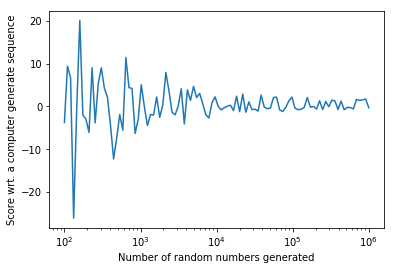

In [107]:
plt.semilogx(num_gen_list,score_list)
plt.xlabel("Number of random numbers generated")
plt.ylabel("Score wrt. a computer generate sequence")

Text(0,0.5,'Std. dev. wrt. a computer generate sequence')

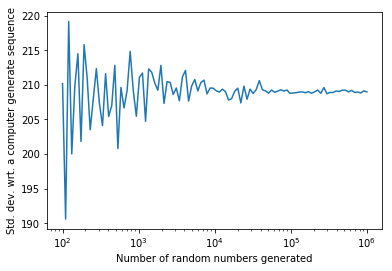

In [108]:
plt.semilogx(num_gen_list,dev_list)
plt.xlabel("Number of random numbers generated")
plt.ylabel("Std. dev. wrt. a computer generate sequence")

# Observations

- The standard deviation from a computer generated random sequence saturates to a fixed value. I do not undersand this. Update, I do. An analytic calculation with the uniform distribution says that this must approach $\frac{M}{\sqrt{6}}$.

- If a is a divisor of M, the sequence saturates to some fixed value. In fact, for some values of M, the method fails to generate all values from $(0,M-1)$.